# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.year.min()

1901

In [8]:
df_data.year.max()

2020

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
print("Duplicated values:", df_data.duplicated().any())

Duplicated values: False


### Check for NaN Values

In [10]:
print("NaN Values:" ,df_data.isna().values.any())

NaN Values: True


In [11]:
print("Columns with NaN values:")
col_subset = df_data.isna().any()
print(col_subset[col_subset == True])

Columns with NaN values:
motivation               True
birth_date               True
birth_city               True
birth_country            True
birth_country_current    True
sex                      True
organization_name        True
organization_city        True
organization_country     True
ISO                      True
dtype: bool


In [12]:
print("Number of NaN values in each column:")
df_data.isna().sum()

Number of NaN values in each column:


year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [13]:
df_data[df_data.birth_date.isna()][['year','category', 'laureate_type', 'birth_date','full_name', 'organization_name']]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [14]:
df_data[df_data.organization_name.isna()][['year', 'category', 'laureate_type', 'full_name', 'organization_name']]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [16]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [17]:
fractions = df_data.prize_share.str.split('/', expand=True)
df_data['share_pct'] = pd.to_numeric(fractions[0]) / pd.to_numeric(fractions[1])

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
gender = df_data.sex.value_counts()
donut_fig = px.pie(values=gender.values, 
                   names=gender.index,
                   hole=0.4,
                   title='Percentage of Male vs. Female Winners')
donut_fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
donut_fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [20]:
df_data[df_data.sex == 'Female'][['year', 'category', 'motivation', 'full_name', 'birth_date', 'birth_country', 'organization_name']].sort_values('year').head(3)

,year,category,motivation,full_name,birth_date,birth_country,organization_name
18,1903,Physics,"""in recognition of the extraordinary services ...","Marie Curie, née Sklodowska",1867-11-07,Russian Empire (Poland),NaN
29,1905,Peace,NaN,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Austrian Empire (Czech Republic),NaN
51,1909,Literature,"""in appreciation of the lofty idealism, vivid ...",Selma Ottilia Lovisa Lagerlöf,1858-11-20,Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [21]:
duplicates = df_data[df_data.full_name.duplicated(keep=False)].sort_values('full_name')[['full_name', 'year', 'category', 'laureate_type']]
print(f'{duplicates.full_name.nunique()} people got the Nobel prize more than once. They are:')
duplicates

6 people got the Nobel prize more than once. They are:


,full_name,year,category,laureate_type
89,Comité international de la Croix Rouge (Intern...,1917,Peace,Organization
215,Comité international de la Croix Rouge (Intern...,1944,Peace,Organization
348,Comité international de la Croix Rouge (Intern...,1963,Peace,Organization
306,Frederick Sanger,1958,Chemistry,Individual
505,Frederick Sanger,1980,Chemistry,Individual
297,John Bardeen,1956,Physics,Individual
424,John Bardeen,1972,Physics,Individual
278,Linus Carl Pauling,1954,Chemistry,Individual
340,Linus Carl Pauling,1962,Peace,Individual
18,"Marie Curie, née Sklodowska",1903,Physics,Individual


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [22]:
df_data.category.nunique()

6

In [23]:
prizes_per_category = df_data.category.value_counts()

bar_fig = px.bar(x=prizes_per_category.index,
                 y=prizes_per_category.values,
                 color=prizes_per_category.values,
                 color_continuous_scale='Aggrnyl',
                 title='Number of Prizes Awarded per Category',)
bar_fig.update_layout(xaxis_title='Category', 
                      yaxis_title='Number of Prizes',
                      coloraxis_showscale=False)
bar_fig.show()


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [24]:
df_data[df_data.category == 'Economics'].sort_values('year')[:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [25]:
gender_per_category = df_data.groupby(['category', 'sex'], as_index=False).count().sort_values('prize', ascending=False)
gender_per_category

,category,sex,year,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,organization_name,organization_city,organization_country,ISO,share_pct
11,Physics,Male,212,212,212,212,212,212,212,212,212,212,211,209,209,212,212
7,Medicine,Male,210,210,210,210,210,210,210,209,210,210,209,210,210,210,210
1,Chemistry,Male,179,179,179,179,179,179,179,179,179,179,177,178,179,179,179
5,Literature,Male,101,101,101,101,101,101,101,100,101,101,0,0,0,101,101
9,Peace,Male,90,90,25,90,90,90,90,89,90,90,4,4,4,90,90
3,Economics,Male,84,84,84,84,84,84,84,84,84,84,82,82,82,84,84
8,Peace,Female,17,17,10,17,17,17,17,17,17,17,0,0,0,17,17
4,Literature,Female,16,16,16,16,16,16,16,16,16,16,0,0,0,16,16
6,Medicine,Female,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
0,Chemistry,Female,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [26]:
bar_fig_split = px.bar(x=gender_per_category.category, y=gender_per_category.prize, color=gender_per_category.sex)
bar_fig_split.update_layout(xaxis_title="Category", yaxis_title="Number of Prizes", title="Number of Prizes Per Category Based on Gender")
bar_fig_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [27]:
prize_per_year = df_data.groupby('year').count().prize
moving_average = prize_per_year.rolling(window=5).mean()

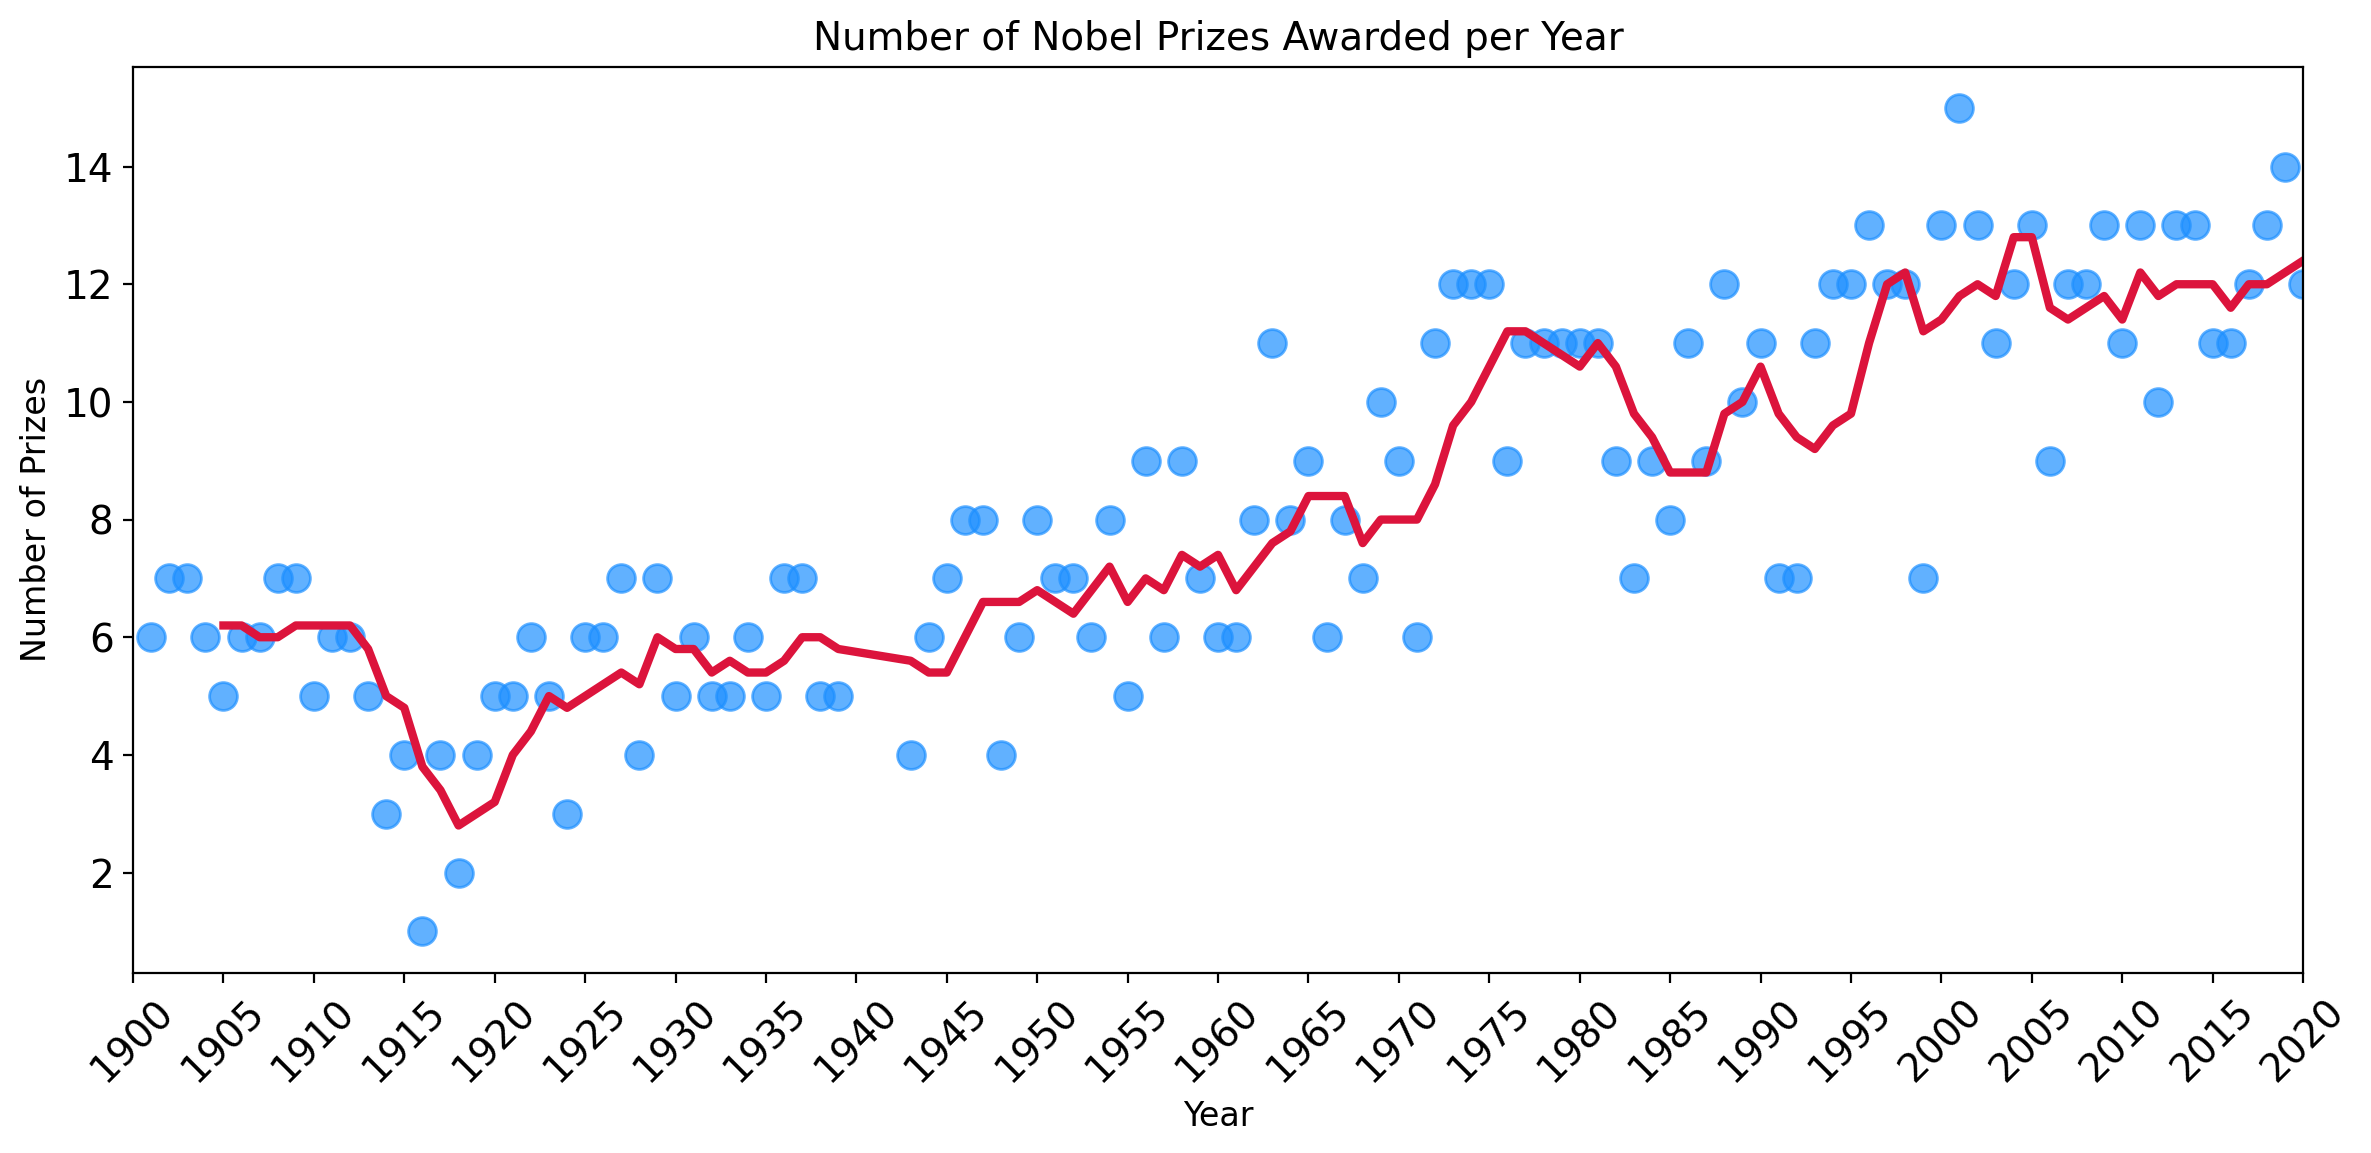

In [28]:
plt.figure(figsize=(14, 6), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Prizes', fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,
           rotation=45,
           ticks=np.arange(start=1900, stop=2021, step=5))

ax = plt.gca()  # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           s=100,
           color='dodgerblue',
           alpha=0.7)

ax.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [29]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

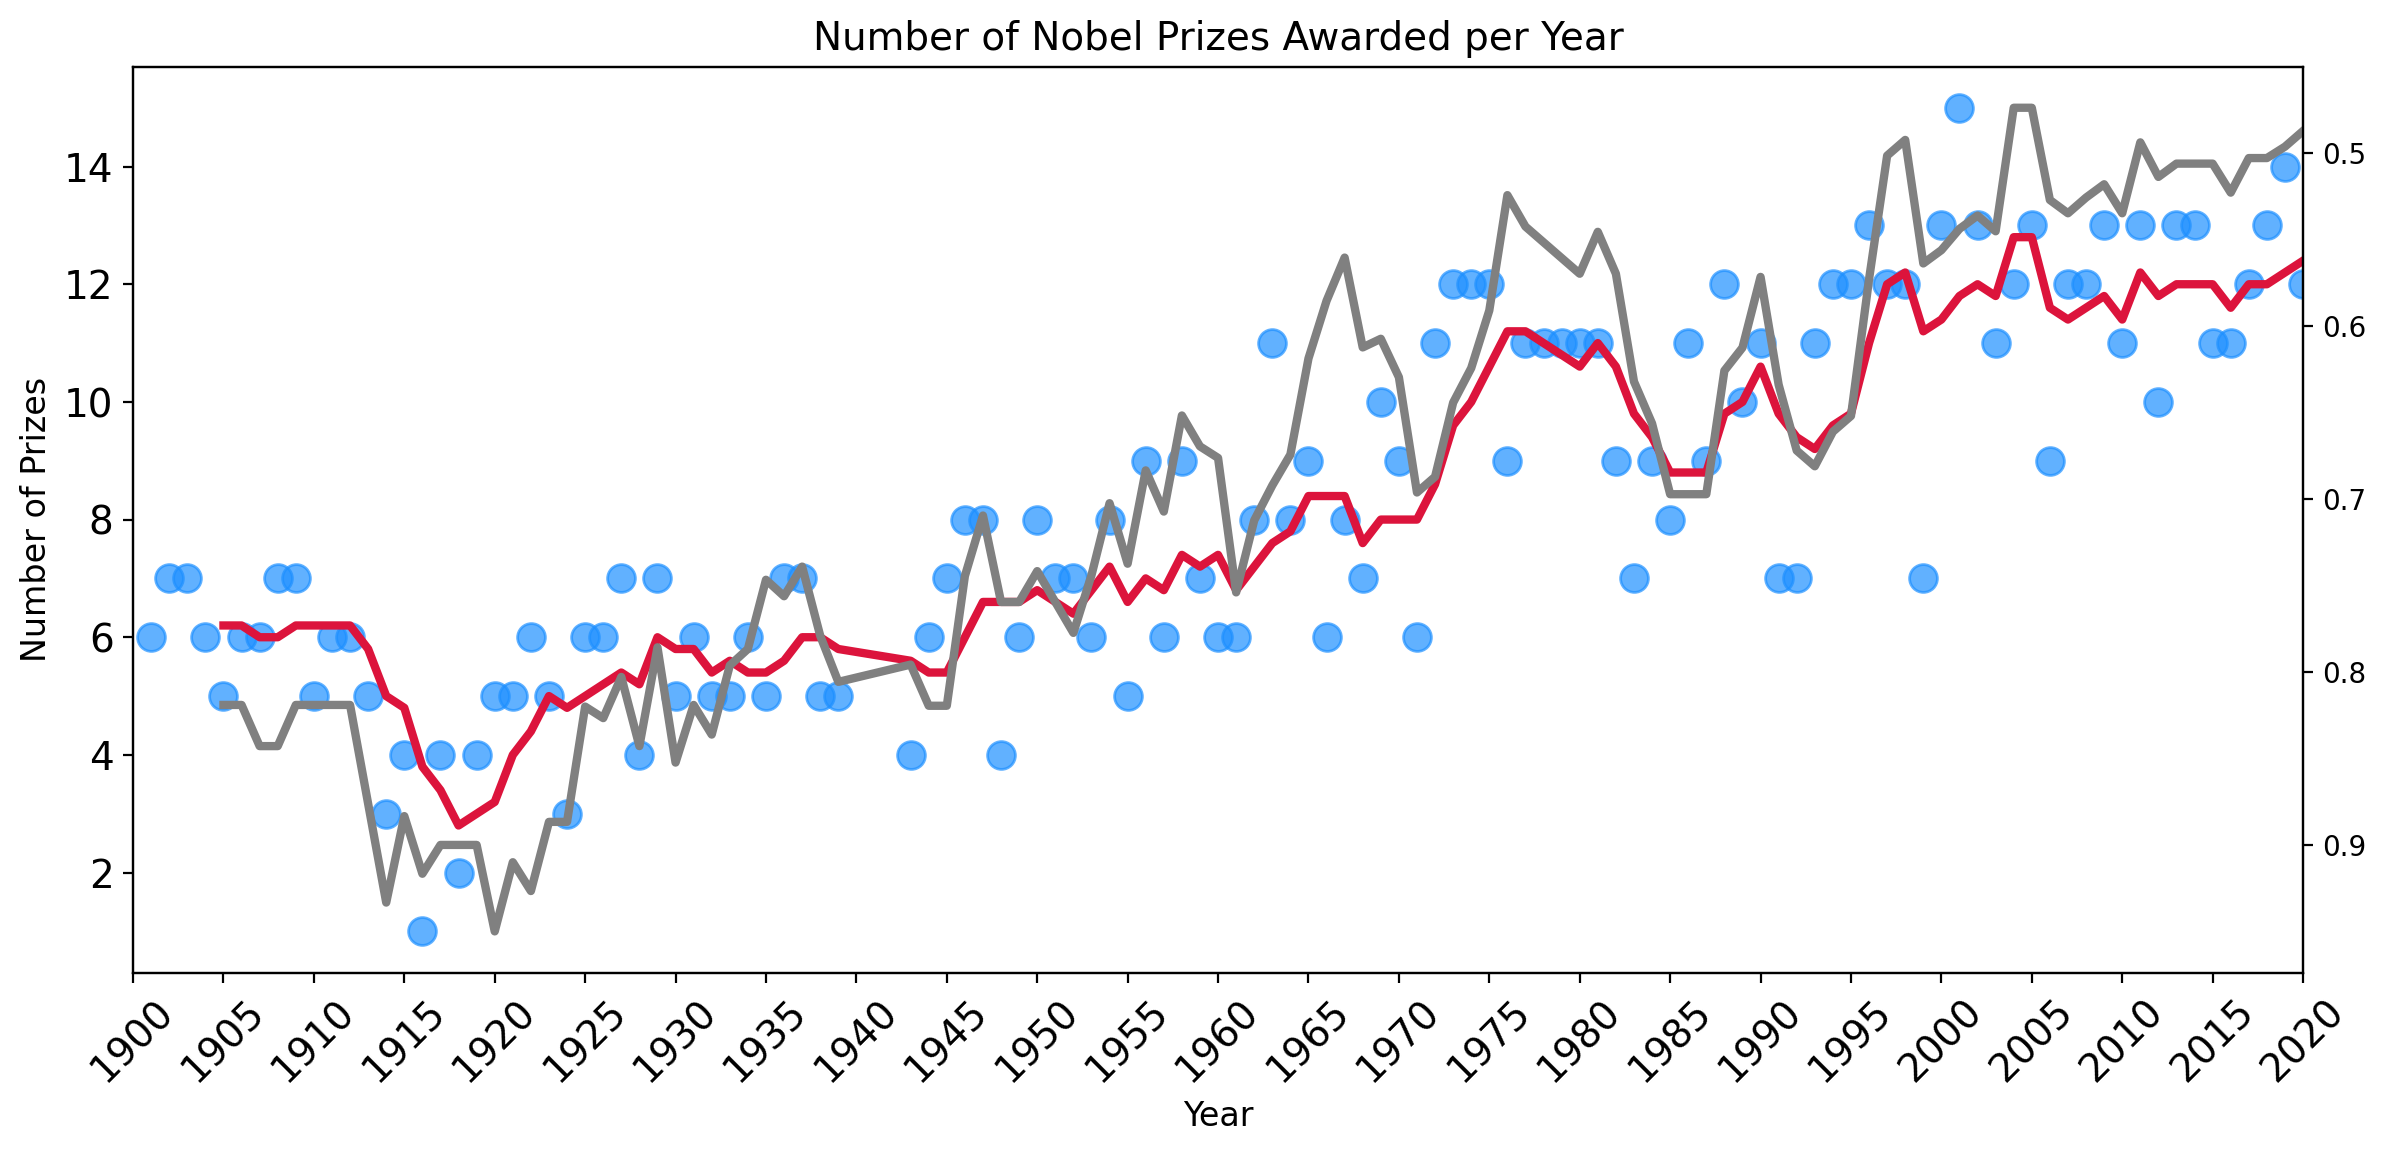

In [30]:
plt.figure(figsize=(14, 6), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Prizes', fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,
           rotation=45,
           ticks=np.arange(start=1900, stop=2021, step=5))

ax1 = plt.gca()  # get current axis
ax2 = ax1.twinx()  # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            s=100,
            color='dodgerblue',
            alpha=0.7)

ax1.plot(prize_per_year.index,
         moving_average.values,
         c='crimson',
         linewidth=3)

# Plot prize share on second y-axis
ax2.plot(prize_per_year.index,
         share_moving_average.values,
         c='grey',
         linewidth=3)

# Invert the second y-axis
ax2.invert_yaxis()

plt.show()


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [31]:
top20_countries = df_data.groupby('birth_country_current', as_index=False).count()[['birth_country_current', 'prize']].sort_values('prize').tail(20)

In [32]:
# Use plotly to make a horizontal bar graph
h_bar = px.bar(x=top20_countries.prize,
             y=top20_countries.birth_country_current,
             orientation='h',
             color=top20_countries.prize,
             color_continuous_scale='Viridis',
             title='Top 20 Countries by Number of Prizes')
h_bar.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Country',
                  coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [33]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).count()[
    ['prize', 'ISO', 'birth_country_current']]
chloropleth = px.choropleth(df_countries,
                            locations='ISO',
                            hover_name='birth_country_current',
                            color='prize',
                            color_continuous_scale='matter',)

chloropleth.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [34]:
# Group by country and category and count the number of prizes
df_cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).count()[['birth_country_current', 'category', 'prize']]
# Create a new column with the total number of prizes per country
df_cat_country['total_prize'] = df_cat_country.groupby('birth_country_current')['prize'].transform('sum')
# Rename the 'prize' column to 'cat_prize'
df_cat_country.rename({'prize': 'cat_prize'}, inplace=True, axis=1)
df_cat_country.sort_values('total_prize', inplace=True)


# Group by country and category and count the number of prizes
df_cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
df_cat_country.sort_values('prize', ascending=False, inplace=True)
# Merge df_cat_country with top20_countries to get the total number of prizes per country
merged_df = pd.merge(df_cat_country, top20_countries, on='birth_country_current')
# Rename the columns
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
# Sort the dataframe by total_prize
merged_df.sort_values('total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [35]:
cat_country_bar = px.bar(x=merged_df.cat_prize,
                         y=merged_df.birth_country_current,
                         orientation='h',
                         color=merged_df.category,
                         title='Top 20 Countries by Number of Prizes and Category')
cat_country_bar.update_layout(xaxis_title='Number of Prizes',
                              yaxis_title='Cou]ntry',
                              coloraxis_showscale=False)
cat_country_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [36]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [37]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [41]:
top20_organizations = df_data.groupby('organization_name', as_index=False).count()[['organization_name', 'prize']].sort_values('prize').tail(20)
top20_organizations

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [48]:
organization_bar = px.bar(x=top20_organizations.prize,
                          y=top20_organizations.organization_name,
                          color=top20_organizations.prize,
                          color_continuous_scale=px.colors.sequential.haline,)
organization_bar.update_layout(xaxis_title='Number of Prizes',
                               yaxis_title='Research Institute',
                               title='Top 20 Research Insitututes by Number of Prizes',
                               coloraxis_showscale=False)
organization_bar.show()


# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [50]:
top20_cities = df_data.groupby('organization_city', as_index=False).count()[['organization_city', 'prize']].sort_values('prize').tail(20)
top20_cities

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [51]:
city_bar = px.bar(x=top20_cities.prize,
                  y=top20_cities.organization_city,
                  color=top20_cities.prize,
                  color_continuous_scale=px.colors.sequential.haline,)
city_bar.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       title='Top 20 Cities by Number of Prizes',
                       coloraxis_showscale=False)
city_bar.show()


# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [69]:
top20_birth_cities = df_data.birth_city.value_counts().sort_values().tail(20)
top20_birth_cities

Copenhagen                3
Cairo                     4
Pittsburgh, PA            4
Montreal                  4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Washington, DC            8
Boston, MA                8
Budapest                  8
Brooklyn, NY              8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [71]:
birth_cities_bar = px.bar(x=top20_birth_cities.values,
                          y=top20_birth_cities.index,
                          orientation='h',
                          color=top20_birth_cities.values,
                          color_continuous_scale=px.colors.sequential.Plasma,)
birth_cities_bar.update_layout(xaxis_title='City',
                               yaxis_title='Number of Prizes',
                               title='Where Were The Most Nobel Laureates Born?',
                               coloraxis_showscale=False)
birth_cities_bar.show()


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [75]:
city_and_organization = df_data.groupby(['organization_country', 'organization_name', 'organization_city'], as_index=False).count()[['organization_country', 'organization_city', 'organization_name', 'prize']].sort_values('prize', ascending=False)
city_and_organization

,organization_country,organization_city,organization_name,prize
214,United States of America,"Cambridge, MA",Harvard University,29
250,United States of America,"Stanford, CA",Stanford University,23
227,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
265,United States of America,"Chicago, IL",University of Chicago,20
259,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
46,France,Paris,World Foundation for AIDS Research and Prevention,1
45,France,Strasbourg,Université de Strasbourg,1
148,Switzerland,Basel,Laboratorium der Farben-Fabriken J.R. Geigy A....,1
150,Switzerland,Lausanne,University of Lausanne,1


In [82]:
city_and_organization_sunburst = px.sunburst(city_and_organization,
                                             path=[
                                                 'organization_country', 'organization_city', 'organization_name'],
                                             values='prize'
                                             )
city_and_organization_sunburst.update_layout(title='Where do Discoveries Take Place?',
                                             coloraxis_showscale=False)
city_and_organization_sunburst.show()


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [85]:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create a histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [100]:
df_data.nlargest(1, 'winning_age')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [87]:
df_data.query('winning_age == winning_age.min()')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [89]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

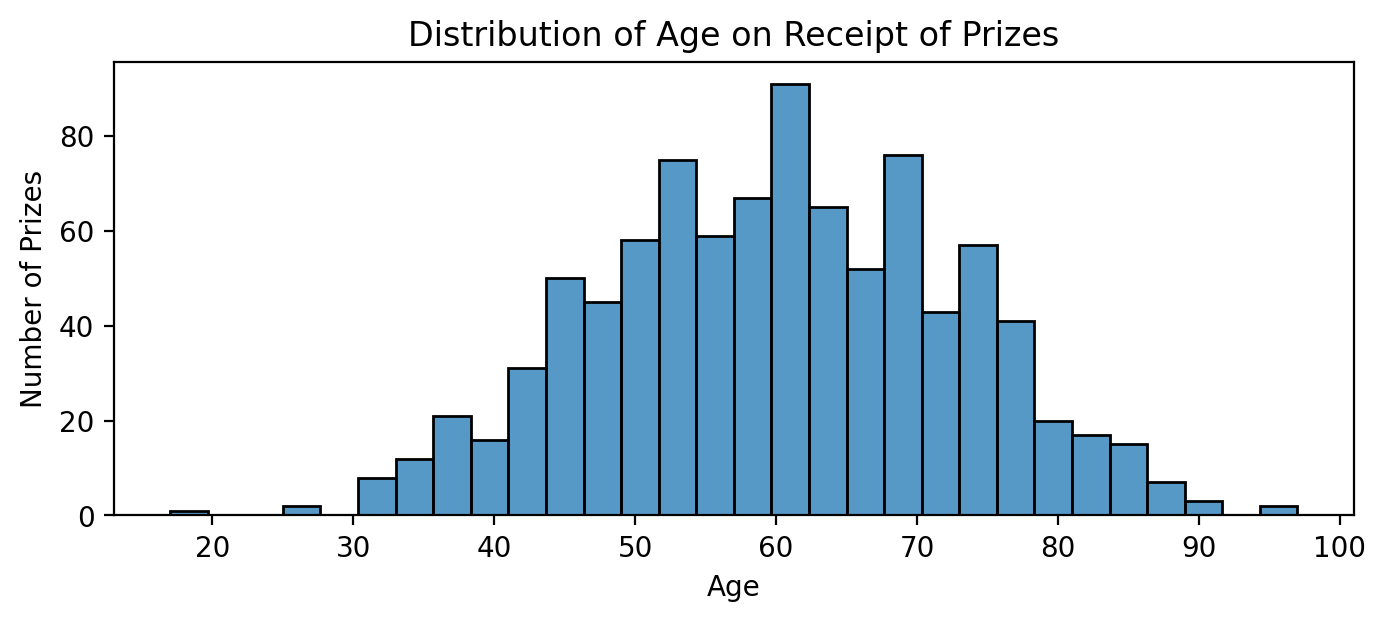

In [111]:
plt.figure(figsize=(8,3), dpi=200)
sns.histplot(df_data, x=df_data.winning_age, bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Prizes')
plt.title('Distribution of Age on Receipt of Prizes')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


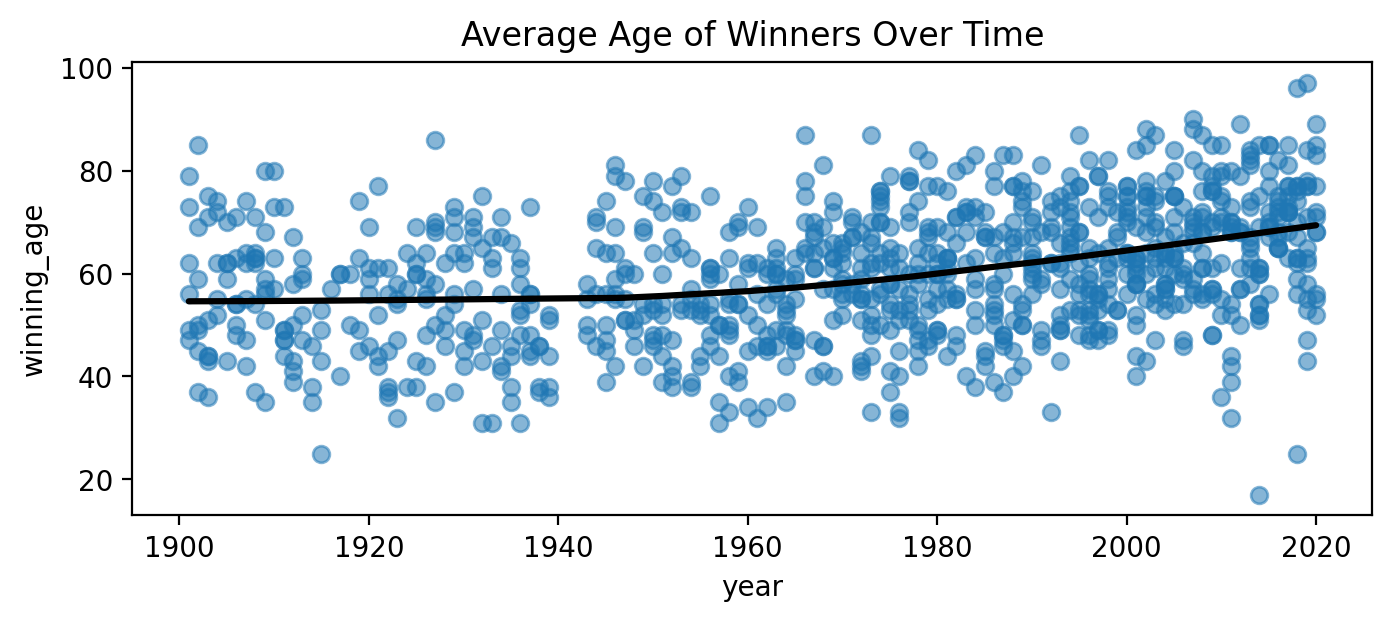

In [139]:
plt.figure(figsize=(8,3), dpi=200)
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Average Age of Winners Over Time')
with sns.axes_style('whitegrid'):
    sns.regplot(
        data=df_data,
        x='year',
        y='winning_age',
        lowess=True,    
        scatter_kws={'alpha': 0.54},
        line_kws={'color': 'black'}
    )
plt.show()

Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

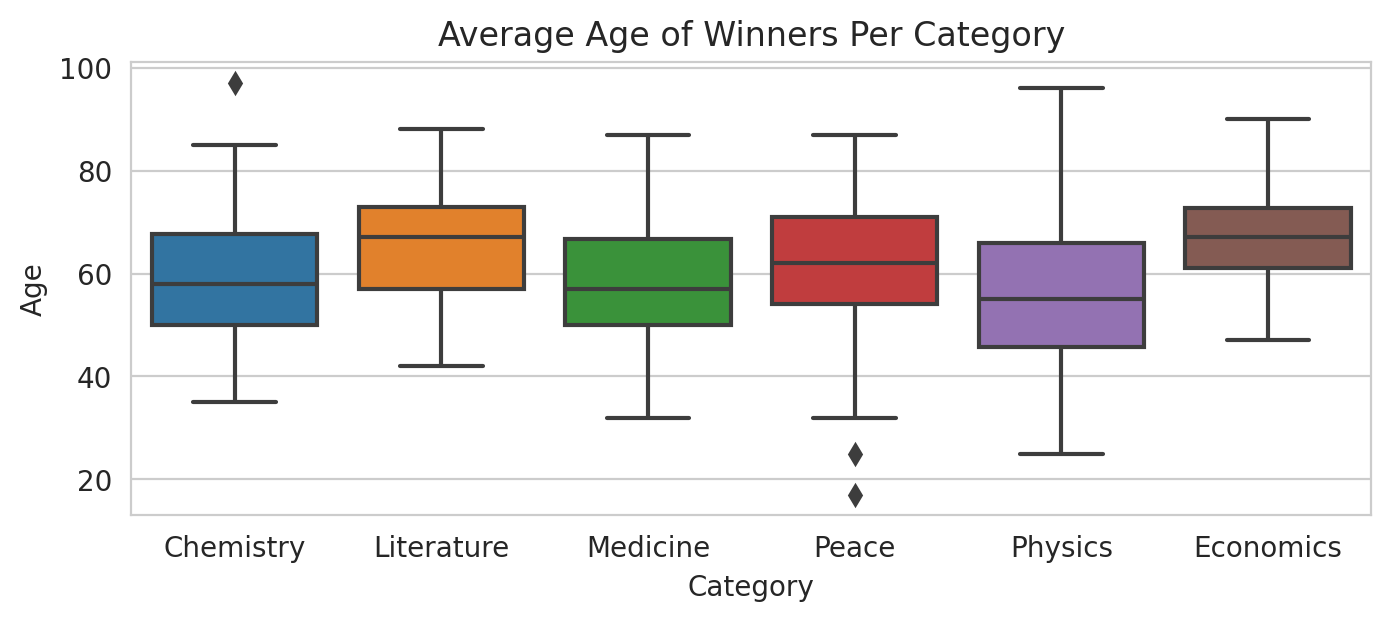

In [138]:
plt.figure(figsize=(8,3), dpi=200)
with sns.axes_style('whitegrid'):
    plt.title('Average Age of Winners Per Category')
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age',)
    plt.xlabel('Category')
    plt.ylabel('Age')
plt.show()

The box plot shows us the mean, the quartiles, the maximum and the minimum values.

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


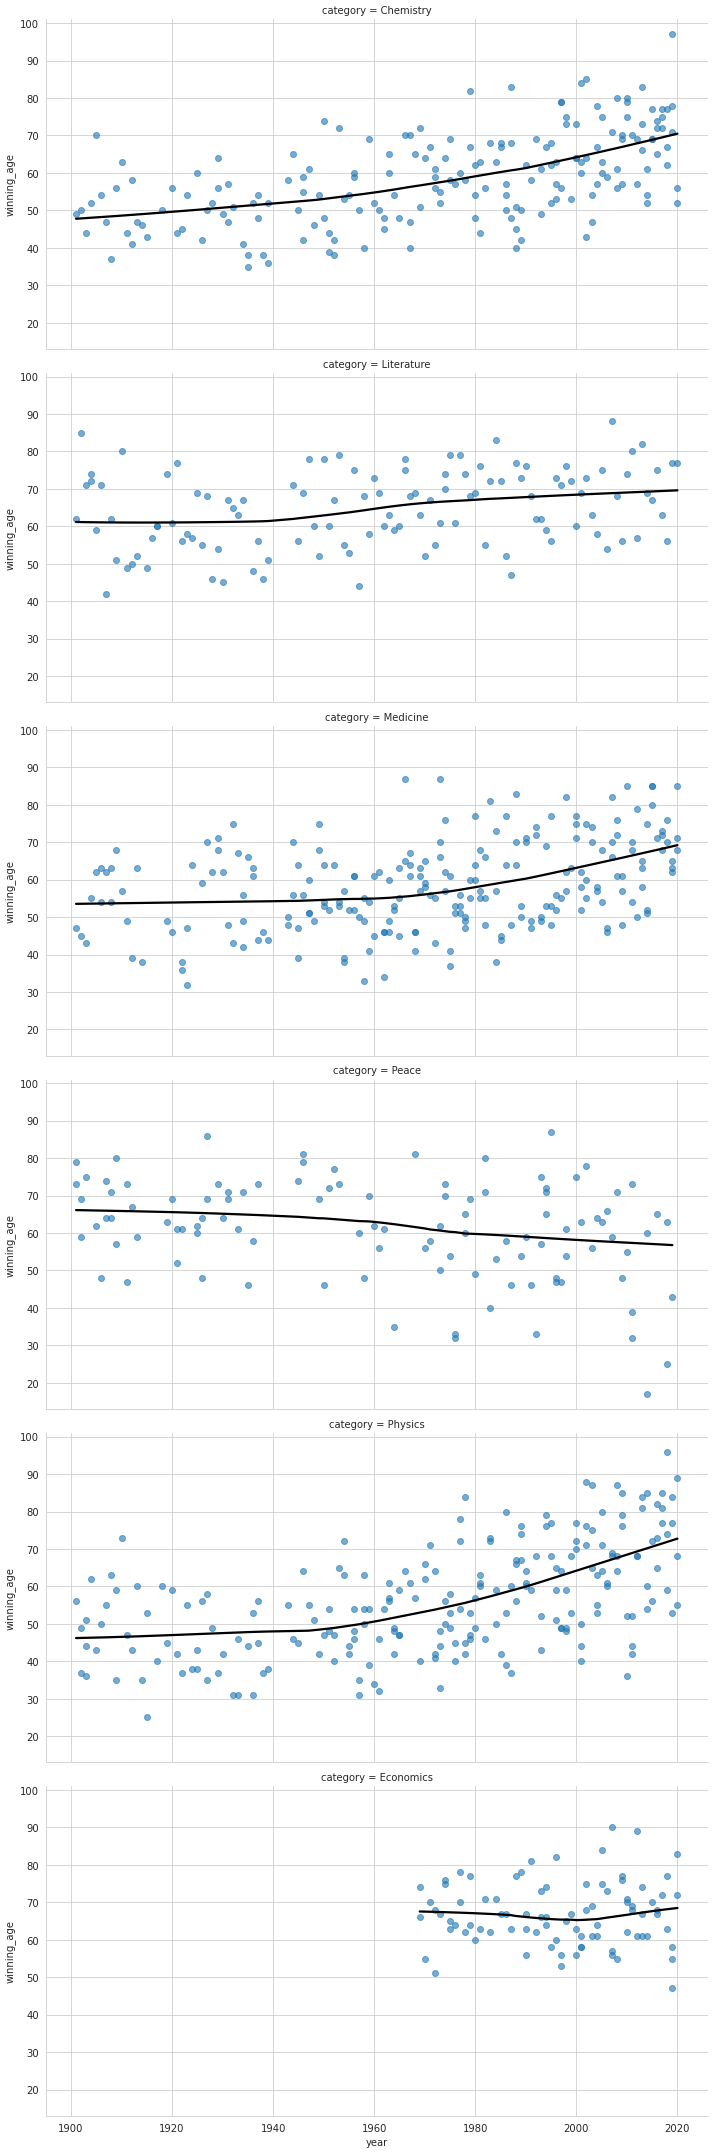

In [152]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               row='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'color': 'black'}
               )

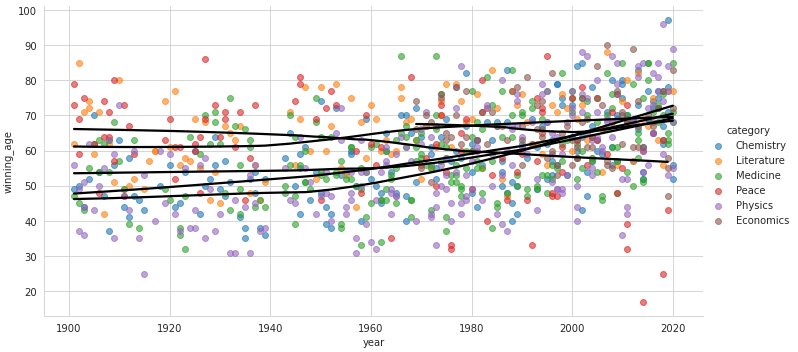

In [155]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'color': 'black'},
               hue='category'
               )
